### Ταξινόμηση με χρήση της βιβλιοθήκης pycaret

* Πρόκειται για μια python βιβλιοθήκη μέσω της οποίας έχουμε την δυνατότητα να δοκιμάσουμε πολλούς διαφορετικούς ταξινομητές (classifiers) και να κρατήσουμε αυτόν που έχει την καλύτερη απόδοση στο σύνολο δεδομένων που αναλύουμε.

* Οι αλγόριθμοι ελέγχονται μέσω πληθώρας διαφορετικών μετρικών (π.χ: accuracy, f1-score, precision, recall, κλπ).

In [1]:
import pandas as pd
from pycaret import classification as clf 

In [2]:
df = pd.read_csv("./data/uci_heart_failure/uci_hf_df.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,tag
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
295,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


* "Στήνουμε" το πείραμα της βιβλιοθήκης pycaret.

* By default το 70% του dataset θα χρησιμοποιηθεί για training και validation ενώ το υπόλοιπο 30% θα χρησιμοποιηθεί ως hold-out για testing.

* Το 70% του dataset χρησιμοποιείται για αξιολόγηση αλγορίθμων μέσω stratified k-fold cross validation.

In [3]:
s = clf.setup(df, target = 'tag', session_id = 123)

,Description,Value
0,Session id,123
1,Target,tag
2,Target type,Binary
3,Original data shape,"(297, 14)"
4,Transformed data shape,"(297, 14)"
5,Transformed train set shape,"(207, 14)"
6,Transformed test set shape,"(90, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


* Γίνεται έλεγχος και αξιολόγηση για μεγάλη γκάμα ταξινομητών

In [4]:
best = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8460,0.8975,0.7911,0.8632,0.8217,0.6874,0.6940,1.2650
ridge,Ridge Classifier,0.8267,0.0000,0.7389,0.8658,0.7903,0.6461,0.6583,0.0130
nb,Naive Bayes,0.8262,0.8875,0.7700,0.8424,0.7999,0.6478,0.6554,0.0140
lda,Linear Discriminant Analysis,0.8217,0.8970,0.7278,0.8640,0.7830,0.6354,0.6486,0.0140
et,Extra Trees Classifier,0.8217,0.8900,0.7889,0.8183,0.7968,0.6377,0.6466,0.1090
ada,Ada Boost Classifier,0.8124,0.8462,0.7933,0.8025,0.7930,0.6224,0.6287,0.0490
rf,Random Forest Classifier,0.8026,0.8890,0.7256,0.8204,0.7651,0.5958,0.6029,0.1060
catboost,CatBoost Classifier,0.8026,0.8814,0.7589,0.7965,0.7748,0.5995,0.6032,1.0460
lightgbm,Light Gradient Boosting Machine,0.7843,0.8752,0.7478,0.7815,0.7608,0.5630,0.5678,0.0650
gbc,Gradient Boosting Classifier,0.7790,0.8576,0.7033,0.7842,0.7307,0.5456,0.5524,0.0540


* Με την συνάρτηση "plot_model()" έχουμε την δυνατότητα να δημιουργήσουμε plots που αφορούν στην απόδοση ενός ταξινομητή στο test set.

* Για παράδειγμα μπορούμε να δημιουργήσουμε ένα confusion matrix

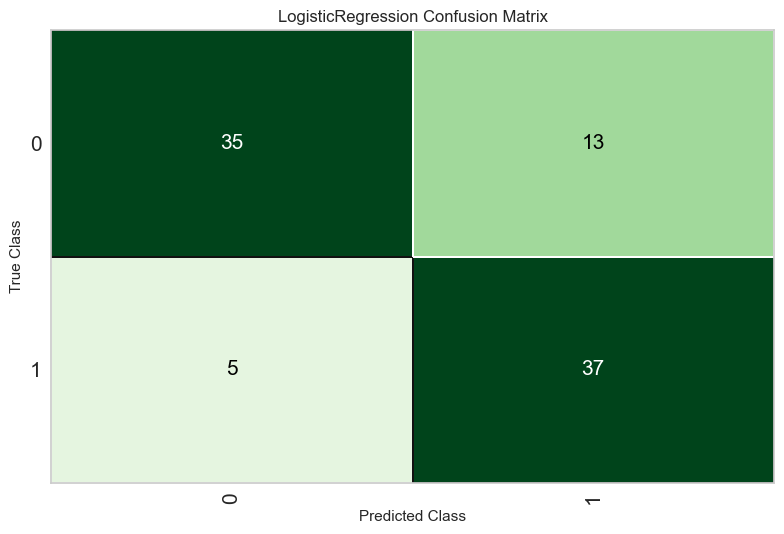

In [5]:
clf.plot_model(best, plot = 'confusion_matrix')

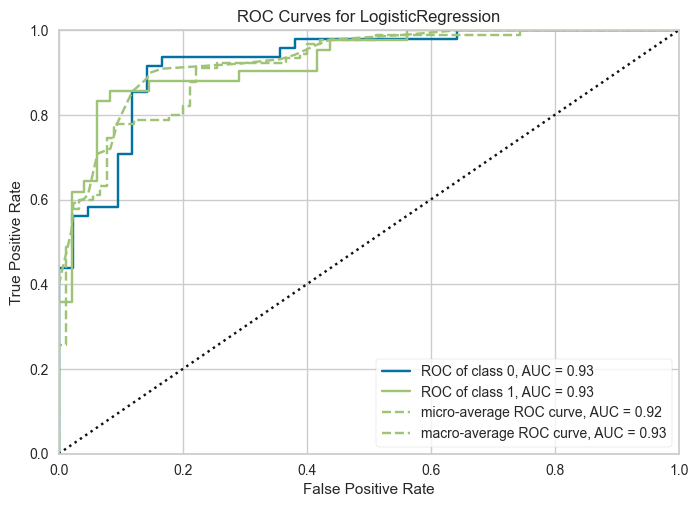

In [6]:
clf.plot_model(best, plot = 'auc')

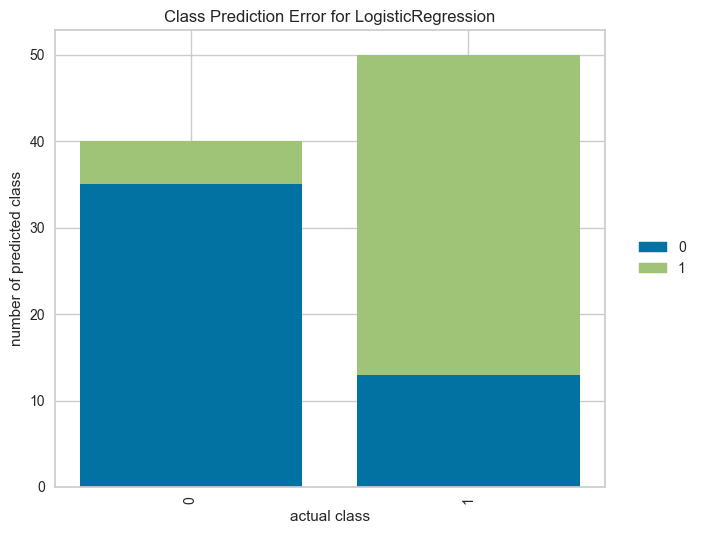

In [7]:
clf.plot_model(best, plot = 'error')

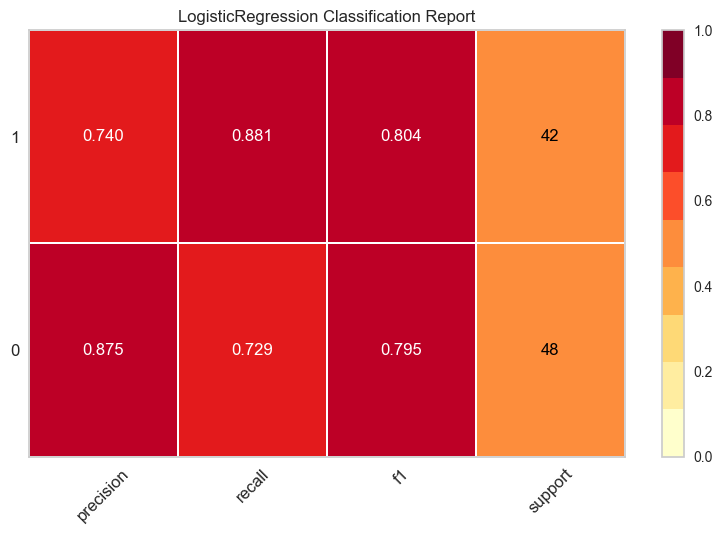

In [8]:
clf.plot_model(best, plot = 'class_report')

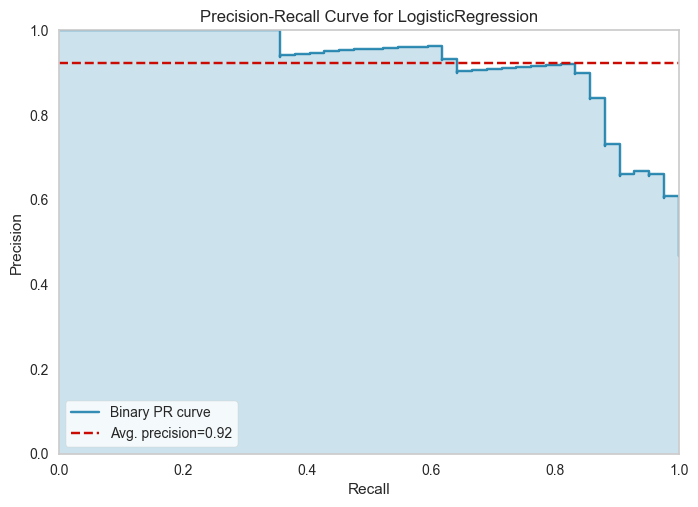

In [9]:
clf.plot_model(best, plot = 'pr')

In [10]:
holdout_pred = clf.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8000,0.9256,0.8810,0.7400,0.8043,0.6029,0.6126


In [ ]:
# def kappa_binary_score(tp, tn, fp, fn):
#     return (2*(tp*tn - fn * fp)) / ((tp+fp)*(fp+tn) + (tp+fn)*(fn+tn))

In [ ]:
# kappa_score(500, 25, 0, 0)